In [76]:
from ensemble_model import *
from w2v import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss


In [2]:
X_text, genes, variants, y_train, N = construct_training_data()
w2v_train_prob = load_single('./2nd_layer_data/w2v/train_prob')
var_train_prob = load_single('./2nd_layer_data/only_var/train_prob')
gene_train_prob = load_single('./2nd_layer_data/only_gene/train_prob')
xgb_train_prob = load_single('./2nd_layer_data/xgboost/train_prob')
tfidf_train_prob = load_single('./2nd_layer_data/tfidf/train_prob')
genevar_train_prob = load_single('./2nd_layer_data/gene-var/train_prob')
w2v_val_prob = load_single('./2nd_layer_data/w2v/test_prob')
var_val_prob = load_single('./2nd_layer_data/only_var/test_prob')
gene_val_prob = load_single('./2nd_layer_data/only_gene/test_prob')
xgb_val_prob = load_single('./2nd_layer_data/xgboost/test_prob')
tfidf_val_prob = load_single('./2nd_layer_data/tfidf/test_prob')
genevar_val_prob = load_single('./2nd_layer_data/gene-var/test_prob')


In [121]:
def cmatrix(p, y):
    labels = [1,2,3,4,5,6,7,8,9]
    cm = np.zeros((9,9))
    for i,cls in enumerate(labels):
        x = np.where(y == cls)[0]
        cm[i] = np.sum(p[x], axis=0)/x.shape[0]
    return cm

def logloss_per_class(p, y):
    labels=[1,2,3,4,5,6,7,8,9]
    cls_proportion = np.array([np.sum(y==cls)/y.count() for cls in labels])
    cls_logloss = np.zeros(9)
    for i, cls in enumerate(labels):
        x = np.where(y == cls)[0]
        cls_logloss[i] = cls_proportion[i]*log_loss(y.values[x], p[x], labels=labels)
    return cls_logloss

In [52]:
x = np.where(y_val == 1)[0]
np.sum(w2v_val_prob[x], axis=0)/x.shape[0]

array([ 0.3653887 ,  0.08689879,  0.01633957,  0.2693496 ,  0.06453171,
        0.08115676,  0.10041429,  0.00776106,  0.00815952])

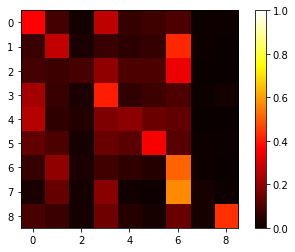

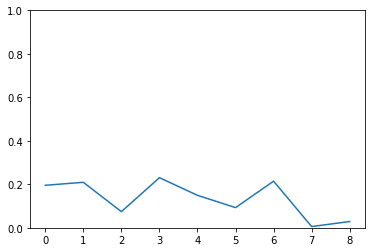

In [132]:
plt.imshow(cmatrix(w2v_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.savefig('presentation/w2vconf.png')
plt.figure()
ll = logloss_per_class(w2v_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/w2vll.png')


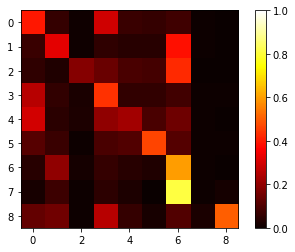

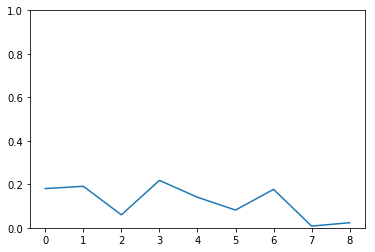

In [133]:
plt.imshow(cmatrix(tfidf_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.figure()
plt.savefig('presentation/tfidfconf.png')
ll = logloss_per_class(tfidf_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/tfidfll.png')


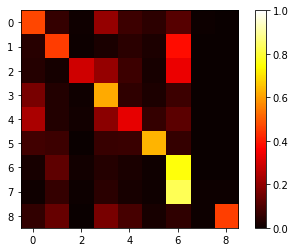

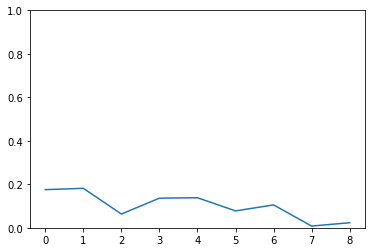

In [137]:
plt.imshow(cmatrix(xgb_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.savefig('presentation/xgbconf.png')
plt.figure()
ll = logloss_per_class(xgb_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/xgbll.png')


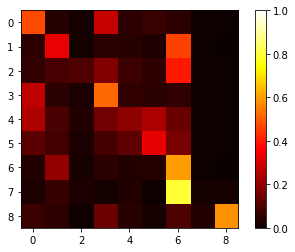

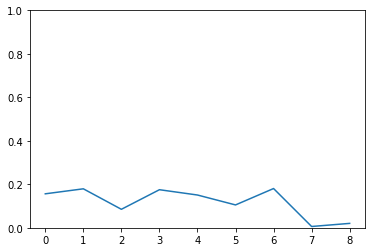

In [138]:
plt.imshow(cmatrix(genevar_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.savefig('presentation/genevarconf.png')

plt.figure()
ll = logloss_per_class(genevar_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/genevarll.png')


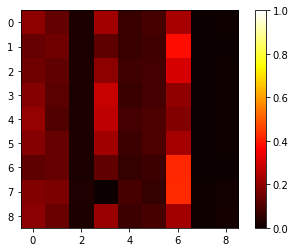

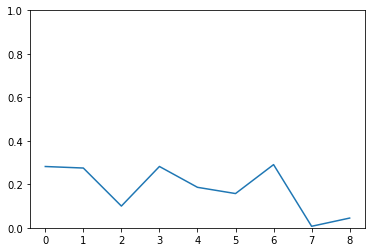

In [139]:
plt.imshow(cmatrix(gene_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.savefig('presentation/geneconf.png')

plt.figure()
ll = logloss_per_class(gene_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/genell.png')

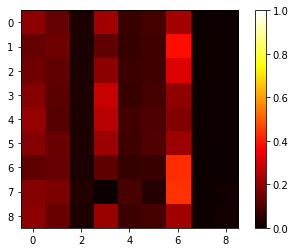

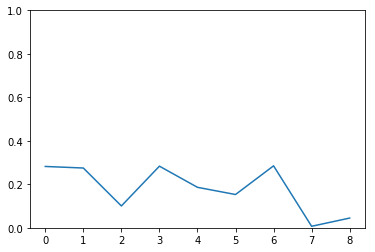

In [140]:
plt.imshow(cmatrix(var_val_prob, y_val),cmap='hot')
plt.clim([0,1])
plt.colorbar()
plt.savefig('presentation/varconf.png')

plt.figure()
ll = logloss_per_class(var_val_prob, y_val)
plt.plot(ll)
plt.ylim([0,1])
plt.savefig('presentation/varll.png')

In [116]:
p = genevar_val_prob
labels=[1,2,3,4,5,6,7,8,9]
cls_proportion = np.array([np.sum(y_val==cls)/y_val.count() for cls in labels])
cls_logloss = np.zeros(9)
for i, cls in enumerate(labels):
    x = np.where(y_val == cls)[0]
    cls_logloss[i] = cls_proportion[i]*log_loss(y_val.values[x], p[x], labels=labels)